/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.4936 - loss: 0.7098 - val_accuracy: 0.5125 - val_loss: 0.7072
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5770 - loss: 0.6833 - val_accuracy: 0.5938 - val_loss: 0.6966
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5764 - loss: 0.6735 - val_accuracy: 0.6000 - val_loss: 0.6900
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6120 - loss: 0.6628 - val_accuracy: 0.5750 - val_loss: 0.6869
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6334 - loss: 0.6486 - val_accuracy: 0.6000 - val_loss: 0.6834
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6423 - loss: 0.6401 - val_accuracy: 0.6062 - val_loss: 0.6794
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6301 - loss: 0.6448 - val_accuracy: 0.6125 - val_loss: 0.6755
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6370 - loss: 0.6340 - val_accuracy: 0.6125 - val_los

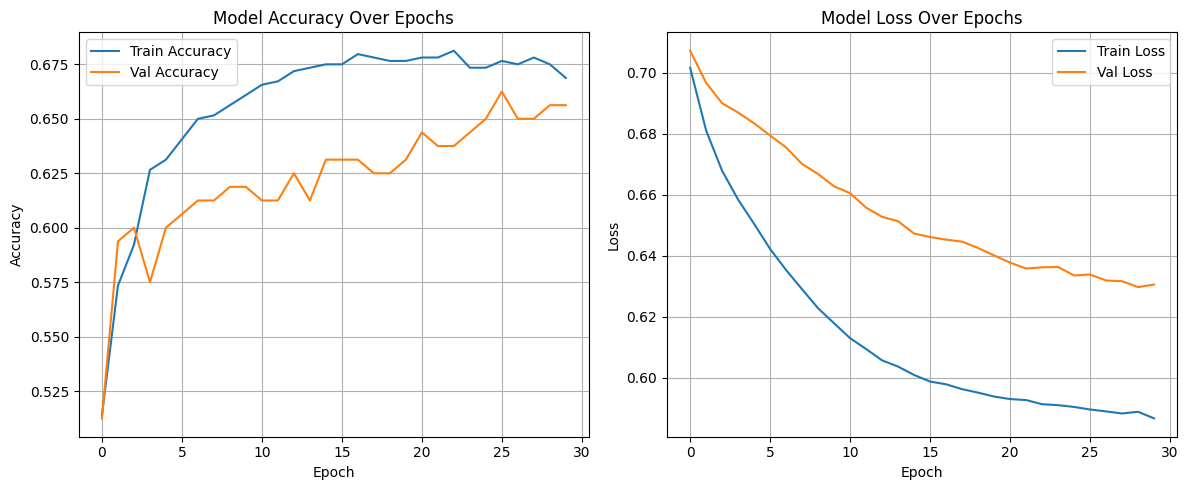

Logistic Regression Test Accuracy: 0.660
Logistic Regression Test ROC-AUC: 0.743

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.83      0.75       124
           1       0.58      0.38      0.46        76

    accuracy                           0.66       200
   macro avg       0.63      0.61      0.61       200
weighted avg       0.65      0.66      0.64       200

Confusion Matrix:


TypeError: too many positional arguments

In [5]:
#!pip install openai
#!pip install python-dotenv
!pip install xgboost
!pip install imbalanced-learn
#import os
#from dotenv import load_dotenv
# Load .env file
#load_dotenv()
#import openai
#openai.api_key = os.getenv("YOUR_OPENAI_API_KEY") # storing the key in .env file
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, roc_auc_score
from imblearn.over_sampling import SMOTE

# Create sample synthetic data
np.random.seed(42)
n_samples = 1000

age = np.random.randint(20, 70, size=n_samples)
income = np.random.normal(50000, 15000, size=n_samples)  # average income 50k
loan_amount = np.random.normal(15000, 7000, size=n_samples)
credit_score = np.random.randint(300, 850, size=n_samples)

# Create a simple rule for default probability
default_prob = (
    0.3 * (loan_amount / income) +
    0.4 * (700 - credit_score) / 400 +
    0.3 * (70 - age) / 50
)
default_prob = np.clip(default_prob, 0, 1)

default = (np.random.rand(n_samples) < default_prob).astype(int)

# Build DataFrame
data = pd.DataFrame({
    'age': age,
    'income': income,
    'loan_amount': loan_amount,
    'credit_score': credit_score,
    'default': default
})

# Preprocess
X = data.drop('default', axis=1)
y = data['default']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build Neural Network
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train_scaled, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate
y_pred_prob = model.predict(X_test_scaled).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)

acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

print(f"Neural Network Test Accuracy: {acc:.3f}")
print(f"Neural Network Test ROC-AUC: {auc:.3f}")
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and train logistic regression
logreg = LogisticRegression(max_iter=500)
logreg.fit(X_train_scaled, y_train)

# Predict
y_log_pred = logreg.predict(X_test_scaled)
y_log_pred_prob = logreg.predict_proba(X_test_scaled)[:, 1]  # Probabilities for ROC-AUC

# Evaluate
log_acc = accuracy_score(y_test, y_log_pred)
log_auc = roc_auc_score(y_test, y_log_pred_prob)

print(f"Logistic Regression Test Accuracy: {log_acc:.3f}")
print(f"Logistic Regression Test ROC-AUC: {log_auc:.3f}")

# Optional: Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_log_pred))

# Optional: Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test, y_log_pred))

from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
#!ls "/content/drive/My Drive/"
import pandas as pd

# Replace this with the actual path to your file
file_path = '/content/drive/My Drive/accepted_2007_to_2018Q4.csv.gz'

# Load the compressed CSV
df = pd.read_csv(file_path, compression='gzip', low_memory=False)

# Preview
print("Shape:", df.shape)
df.head()
# Keep only loans that are either Fully Paid or Charged Off
df = df[df['loan_status'].isin(['Fully Paid', 'Charged Off'])]

# Create target variable: 1 = default, 0 = fully paid
df['default'] = df['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)

print("Filtered shape:", df.shape)
df['default'].value_counts()
# List of useful columns
selected_cols = [
    'loan_amnt', 'term', 'int_rate', 'installment', 'grade',
    'emp_length', 'home_ownership', 'annual_inc', 'purpose',
    'dti', 'delinq_2yrs', 'revol_util', 'total_acc', 'default'
]

# Keep only these
df = df[selected_cols].copy()
# Drop rows with any missing values
df.dropna(inplace=True)
print("After dropping NA:", df.shape)
# One-hot encode categoricals (drop_first avoids dummy variable trap)
df = pd.get_dummies(df, columns=['term', 'grade', 'emp_length', 'home_ownership', 'purpose'], drop_first=True)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


# Separate features and target
X = df.drop('default', axis=1)
y = df['default']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to the training data to handle imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

# Train logistic regression
logreg = LogisticRegression(max_iter=500)
logreg.fit(X_train_resampled, y_train_resampled)

# Predict
y_pred_log = logreg.predict(X_test_scaled)
y_pred_prob_log = logreg.predict_proba(X_test_scaled)[:, 1]

# Evaluate
acc_log = accuracy_score(y_test, y_pred_log)
auc_log = roc_auc_score(y_test, y_pred_prob_log)

print(f"Logistic Regression Accuracy: {acc_log:.3f}")
print(f"Logistic Regression ROC-AUC: {auc_log:.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))
print("\n Confusion Matrix:\n",confusion_matrix(y_test, y_pred_log))
scale_pos_weight = len(y_train[y_train==0]) / len(y_train[y_train==1])
print(scale_pos_weight)
import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

# Calculate class imbalance ratio
scale_pos_weight = len(y_train[y_train==0]) / len(y_train[y_train==1])

# XGBoost Classifier
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Fit the model
xgb_model.fit(X_train_resampled, y_train_resampled)

# Predict
y_pred_xgb = xgb_model.predict(X_test_scaled)
y_pred_prob_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation
acc_xgb = accuracy_score(y_test, y_pred_xgb)
auc_xgb = roc_auc_score(y_test, y_pred_prob_xgb)

print(f"XGBoost Accuracy: {acc_xgb:.3f}")
print(f"XGBoost ROC-AUC: {auc_xgb:.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
import numpy as np
unique, counts = np.unique(y_train_resampled, return_counts=True)
print(dict(zip(unique, counts)))